In [ ]:
#This data was given to me in a CSV file and I was asked clean the data, carry out descriptive statistics and to
# generate graphs. The aim of the analysis was to see if there was a relationship between the two variables.
# the hypothesis that there would be a statistically significant relationship between the two scores was accepted.
# A Pearson's correlation was used to test this hypothesis.

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('SRPython.csv')

In [6]:
df.head()

,ID,SUS.Score,RTLX.Score
0,1,15.0,25
1,2,55.0,38
2,3,87.5,42
3,4,45.0,39
4,5,80.0,49


In [7]:
df.tail()

,ID,SUS.Score,RTLX.Score
95,96,82.5,51
96,97,75.0,54
97,98,12.5,31
98,99,87.5,50
99,100,65.0,51


In [18]:
df.describe()

,ID,SUS.Score,RTLX.Score
count,100.000000,100.000000,100.00000
mean,50.500000,53.650000,42.62000
std,29.011492,24.320098,9.40855
min,1.000000,-2.500000,20.00000
25%,25.750000,35.000000,36.75000
50%,50.500000,52.500000,42.50000
75%,75.250000,70.000000,50.00000
max,100.000000,105.000000,62.00000


In [19]:
#For SUS score, the minimum possible score is 0, and it appears there is a value of -2.5. The data will need to
#be cleaned of any impossible values.

In [21]:
print(df.dtypes)

ID              int64
SUS.Score     float64
RTLX.Score      int64
dtype: object


In [22]:
df[["RTLX.Score"]].astype(float)

,RTLX.Score
0,25.0
1,38.0
2,42.0
3,39.0
4,49.0
...,...
95,51.0
96,54.0
97,31.0
98,50.0


In [43]:
negative_rows = df[df['SUS.Score'] < 0]

In [44]:
print(negative_rows)
#so row number 91 (ID = 92) has an impossible value

Empty DataFrame
Columns: [ID, SUS.Score, RTLX.Score]
Index: []


In [45]:
df = df.drop(negative_rows.index)

In [46]:
#negative vlaue has now been removed

91


In [47]:
df.describe()

,ID,SUS.Score,RTLX.Score
count,99.000000,99.000000,99.000000
mean,50.080808,54.217172,42.717172
std,28.853139,23.769853,9.405861
min,1.000000,0.000000,20.000000
25%,25.500000,36.250000,37.500000
50%,50.000000,52.500000,43.000000
75%,74.500000,70.000000,50.000000
max,100.000000,105.000000,62.000000


In [48]:
#SUS also has a max score of 100, but there is a score of 105 present. This needs to be removed.

In [49]:
invalid_rows = df[df['SUS.Score'] > 100]
print(invalid_rows)

    ID  SUS.Score  RTLX.Score
87  88      105.0          55


In [50]:
#row 87 (id = 88) needs to be removed

In [51]:
df = df.drop(invalid_rows.index)

In [53]:
df.describe()

,ID,SUS.Score,RTLX.Score
count,98.000000,98.000000,98.000000
mean,49.693878,53.698980,42.591837
std,28.742156,23.323226,9.370756
min,1.000000,0.000000,20.000000
25%,25.250000,35.625000,37.250000
50%,49.500000,52.500000,42.500000
75%,73.750000,70.000000,50.000000
max,100.000000,100.000000,62.000000


In [54]:
#value has been removed
#data has been cleaned, lets examine data with some graphs

<AxesSubplot:xlabel='SUS.Score', ylabel='Count'>

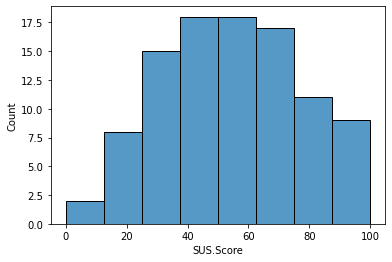

In [57]:
import seaborn as sns
sns.histplot(df['SUS.Score'])


<AxesSubplot:xlabel='RTLX.Score', ylabel='Count'>

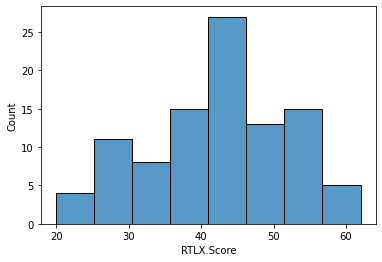

In [58]:
sns.histplot(df['RTLX.Score'])

In [59]:
#Both sets of data appear to be relartively normally distributed

In [60]:
#lets check some boxplots to check for outliers

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUS.Score'>

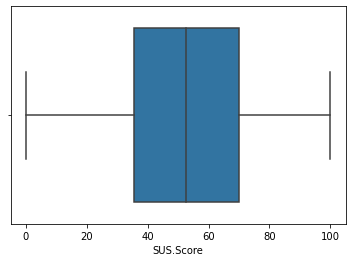

In [62]:
sns.boxplot(df['SUS.Score'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RTLX.Score'>

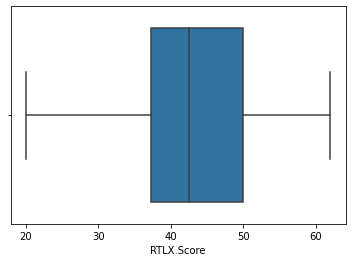

In [63]:
sns.boxplot(df['RTLX.Score'])

In [64]:
#visual inspection shows no outl;iers, but to be sure, lets check if any values lie outside of 3 SD's

In [65]:
SUSMean = df['SUS.Score'].mean()
SUSStd = df['SUS.Score'].std()

In [68]:
SUSOutliers = df[(df['SUS.Score'] < SUSMean - 3*SUSStd) | (df['SUS.Score'] > SUSMean + 3*SUSStd)]



In [69]:
print(SUSOutliers)

Empty DataFrame
Columns: [ID, SUS.Score, RTLX.Score]
Index: []


In [70]:
# no outliers present for SUS.Score. Now lets check RTLX.Score

In [71]:
RTLXMean = df['RTLX.Score'].mean()
RTLXStd = df['RTLX.Score'].std()

RTLXOutliers = df[(df['RTLX.Score'] < RTLXMean - 3*RTLXStd) | (df['RTLX.Score'] > RTLXMean + 3*RTLXStd)]



In [72]:
print(RTLXOutliers)

Empty DataFrame
Columns: [ID, SUS.Score, RTLX.Score]
Index: []


In [73]:
# no outliers for RTLX either.

In [74]:
#the task is to analyse if there is a relationship between these two scores. A pearson's correlation is 
#likely the best way to analyse this.
#lets take a look at a scatterplot

<AxesSubplot:xlabel='SUS.Score', ylabel='RTLX.Score'>

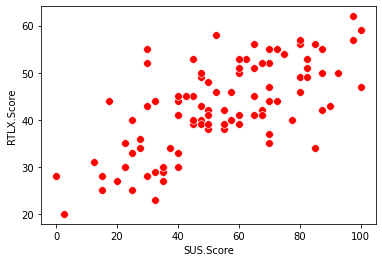

In [77]:
sns.scatterplot(x='SUS.Score', y='RTLX.Score', data=df, marker = 'o', s=60, color = 'red')

In [78]:
#it appears that there is a strong positive correlation between the two variables. 
#in order to ensure a Pearson's can be run, we need to use a Shapiro Wilk test

In [79]:
from scipy.stats import shapiro

sus_score_stat, sus_score_p = shapiro(df['SUS.Score'])
rtlx_score_stat, rtlx_score_p = shapiro(df['RTLX.Score'])


In [80]:
print("SUS.Score Shapiro-Wilk statistic:", sus_score_stat)
print("SUS.Score Shapiro-Wilk p-value:", sus_score_p)
print("RTLX.Score Shapiro-Wilk statistic:", rtlx_score_stat)
print("RTLX.Score Shapiro-Wilk p-value:", rtlx_score_p)


SUS.Score Shapiro-Wilk statistic: 0.9864733219146729
SUS.Score Shapiro-Wilk p-value: 0.41781580448150635
RTLX.Score Shapiro-Wilk statistic: 0.9804196953773499
RTLX.Score Shapiro-Wilk p-value: 0.15219536423683167


In [81]:
#As we can see, the P-value is far greater than 0.05 for both variables, which means that the distribution is normal

In [82]:
#now lets run out Pearson's correlation 

In [83]:
from scipy.stats import pearsonr

corr, p = pearsonr(df['SUS.Score'], df['RTLX.Score'])


In [84]:
print("Pearson's correlation coefficient:", corr)
print("p-value:", p)


Pearson's correlation coefficient: 0.6809192561629134
p-value: 1.2163791897045553e-14


In [85]:
#r(96) = 0.68, p < 0.001

In [ ]:
#There is a moderately strong positive correlation between the two scores. The results are significant to the 
# level of p < 0.001